In [1]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importando o dataset Iris
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# Derteminando o X e o y
X_iris, y_iris = load_iris(return_X_y=True, as_frame=True)

In [4]:
# Visualizando
X_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [5]:
# selecionando apenas as colunas de pérolas e o target 0 e 1
X = X_iris.loc[y_iris.isin([0, 1]), ['petal length (cm)', 'petal width (cm)']]
y = y_iris.loc[y_iris.isin([0,1])]

In [6]:
# Verificando o valor de y
y.value_counts()

,count
target,
0,50
1,50


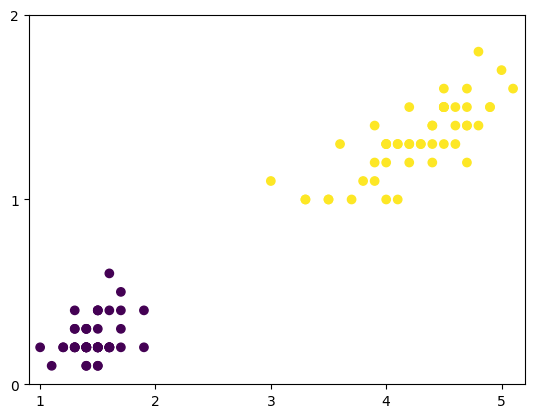

In [7]:
# Observando graficamente os dados
fig, ax = plt.subplots()

ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y)

ax.set(xlim=(0.9, 5.2), xticks=[1,2,3,4,5],
       ylim=(0,2), yticks=[0,1,2])

plt.show()

In [8]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
# importando o perceptron
from sklearn.linear_model import Perceptron

In [10]:
# Criando um classificador
clf = Perceptron(tol=1e-3, random_state=0, eta0=0.1)

In [11]:
# Fazendo o fit vom os dados /fit => dados de treino
clf = clf.fit(X_train, y_train)

In [12]:
# Fazendo a previsão / previsão => dados de teste
y_pred = clf.predict(X_test)

In [13]:
# importando a matriz de confusão
from sklearn.metrics import confusion_matrix

In [14]:
# avaliando o modelo
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 0, 14]])

In [15]:
 # verificando o coef_
 clf.coef_

array([[0.08, 0.08]])

In [16]:
# e o intercept
clf.intercept_

array([-0.2])

In [17]:
# POdemos escrever w1, w2 e wo como:
w1 = round(clf.coef_[0][0],2)
w2 = round(clf.coef_[0][1],2)
w0 = clf.intercept_[0]

print(f'w1 = {w1}, w2 = {w2}, wo = {w0}')

w1 = 0.08, w2 = 0.08, wo = -0.2


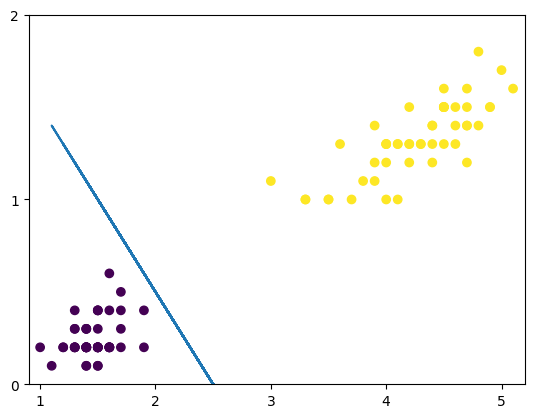

In [18]:
# Adicionando essa reta no gráfico
fig, ax = plt.subplots()

ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train)
ax.plot(X_train.iloc[:,0], (-w1*X_train.iloc[:,0] - w0) /w2)
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test)

ax.set(xlim=(0.9,5.2), xticks=[1,2,3,4,5],
       ylim=(0,2), yticks=[0,1,2])

plt.show()

In [19]:
# agora conseiderando as classes 1 e 2
X = X_iris.loc[y_iris.isin([1, 2]), ['petal length (cm)', 'petal width (cm)']]
y = y_iris.loc[y_iris.isin([1, 2])]

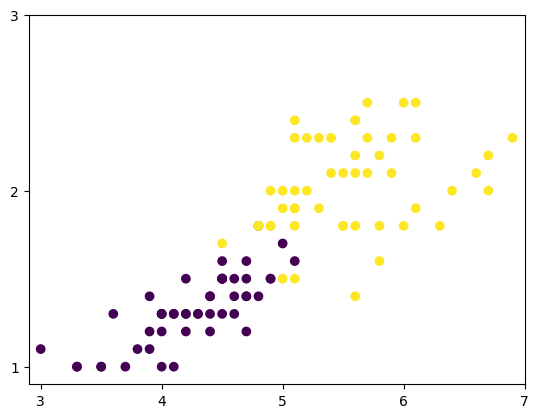

In [20]:
# Observando graficamente os dados
fig, ax = plt.subplots()

ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y)

ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9,3), yticks=[1,2,3])

plt.show()

In [21]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
# Criando o classificador
clf = Perceptron(tol=1e-3, random_state=0, eta0=0.1)

In [23]:
# Fazendo o fit com os dados
clf = clf.fit(X_train, y_train)

In [24]:
# Fazendo a previsão
y_pred = clf.predict(X_test)

In [25]:
# Avaliando o modelo
confusion_matrix(y_pred, y_test)

array([[19,  2],
       [ 0, 12]])

In [26]:
# Podemos escrever w1, w2, e w0 como:
w1 = round(clf.coef_[0][0],2)
w2 = round(clf.coef_[0][1],2)
w0 = clf.intercept_[0]

print(f'w1 = {w1}, w2 = {w2}, wo = {w0}')

w1 = -0.24, w2 = 3.07, wo = -3.800000000000002


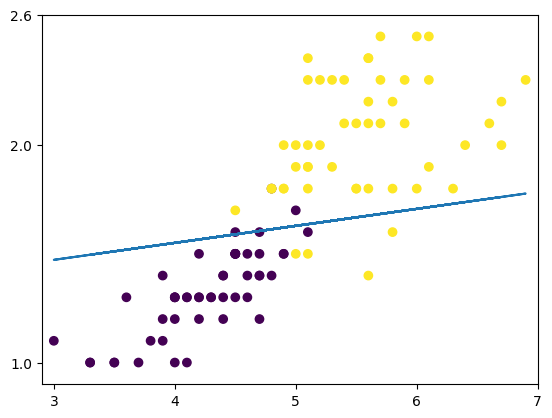

In [27]:
# Adicionando essa reta no gráfico
fig, ax = plt.subplots()

ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train)
ax.plot(X_train.iloc[:,0], (-w1*X_train.iloc[:,0] - w0) /w2)
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test)

ax.set(xlim=(2.9,7), xticks=[3,4,5,6,7],
       ylim=(0.9,2.6), yticks=[1,2,2.6])

plt.show()

# **Analisando o problema do OR e do XOR**

## **1º Caso: OR**

In [28]:
# Vamos considerar inicialmente os dados abaixo
dados = pd.DataFrame({'x1': [0, 0, 1, 1],
                      'x2': [0, 1, 0, 1],
                      'y': [0, 1, 1, 1]})

In [29]:
# Visualizando a base
dados

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


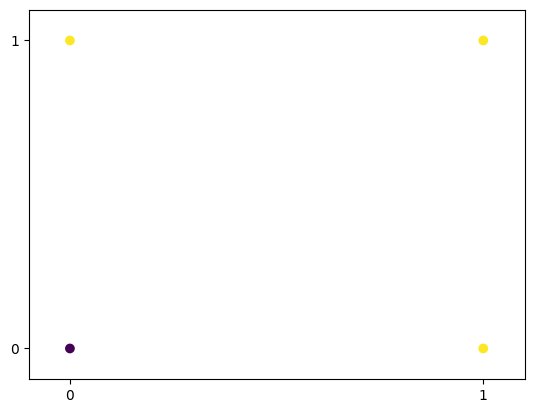

In [30]:
# observando graficamente
fig, ax = plt.subplots()

ax.scatter(dados.x1, dados.x2, c=dados.y)

ax.set(xlim=[-0.1,1.1], xticks=[0,1],
       ylim=[-0.1,1.1], yticks=[0,1])

plt.show()

In [31]:
# Criando o classificador
clf = Perceptron(tol=1e-3, random_state=0, eta0=0.1)

In [32]:
# Selecionando X e y
X = dados[['x1', 'x2']]
y = dados.y

In [33]:
# Fazendo o fit com os dados
clf = clf.fit(X,y)

In [34]:
# Fazendo a previsão
y_pred =clf.predict(X)
y_pred

array([0, 1, 1, 1])

In [35]:
# Avaliando o modelo
confusion_matrix(y, y_pred)

array([[1, 0],
       [0, 3]])

In [36]:
# verificando coef
clf.coef_

array([[0.2, 0.2]])

In [37]:
# verificando o intercept
clf.intercept_

array([-0.1])

In [38]:
# Podemos escrever w1, w2, e w0 como:
w1 = round(clf.coef_[0][0],2)
w2 = round(clf.coef_[0][1],2)
w0 = clf.intercept_[0]

print(f'w1 = {w1}, w2 = {w2}, wo = {w0}')

w1 = 0.2, w2 = 0.2, wo = -0.1


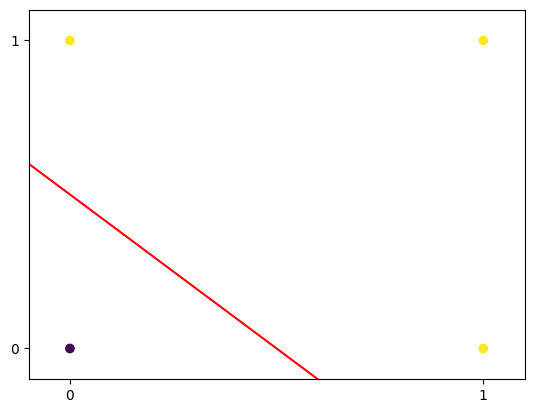

In [39]:
# Visualizando esse resultado graficamente
fig, ax = plt.subplots()

# Criando um array de x
X_perc = np.linspace(-0.1,1,100)

# Agora calculando o y
y_perc = (-w1*X_perc - w0) / w2

ax.scatter(dados.x1, dados.x2, c=dados.y)
ax.plot(X_perc, y_perc, 'r')

ax.set(xlim=[-0.1,1.1], xticks=[0,1],
       ylim=[-0.1,1.1], yticks=[0,1])

plt.show()

## **2º Caso: XOR**

In [40]:
# Vamos considerar inicialmente os dados abaixo
dados = pd.DataFrame({'x1': [0, 0, 1, 1],
                      'x2': [0, 1, 0, 1],
                      'y': [0, 1, 1, 0]})

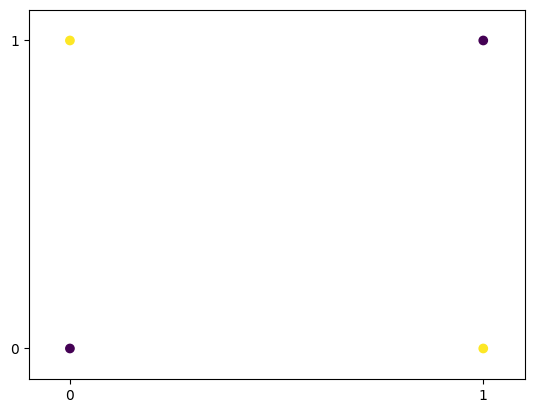

In [41]:
# observando graficamente
fig, ax = plt.subplots()

ax.scatter(dados.x1, dados.x2, c=dados.y)

ax.set(xlim=[-0.1,1.1], xticks=[0,1],
       ylim=[-0.1,1.1], yticks=[0,1])

plt.show()

In [42]:
# Selecionando X e y
X = dados[['x1', 'x2']]
y = dados.y

In [43]:
# Fazendo o fit com os dados
clf = clf.fit(X,y)

In [45]:
# Fazendo a previsão
y_pred =clf.predict(X)
y_pred

array([0, 0, 0, 0])

In [46]:
# Avaliando o modelo
confusion_matrix(y, y_pred)

array([[2, 0],
       [2, 0]])

In [47]:
# verificando coef
clf.coef_

array([[0., 0.]])

In [48]:
# verificando o intercept
clf.intercept_

array([0.])

In [49]:
# Podemos escrever w1, w2, e w0 como:
w1 = round(clf.coef_[0][0],2)
w2 = round(clf.coef_[0][1],2)
w0 = clf.intercept_[0]

print(f'w1 = {w1}, w2 = {w2}, wo = {w0}')

w1 = 0.0, w2 = 0.0, wo = 0.0


<ipython-input-50-0b5605c3a534>:8: RuntimeWarning: invalid value encountered in divide
  y_perc = (-w1*X_perc - w0) / w2


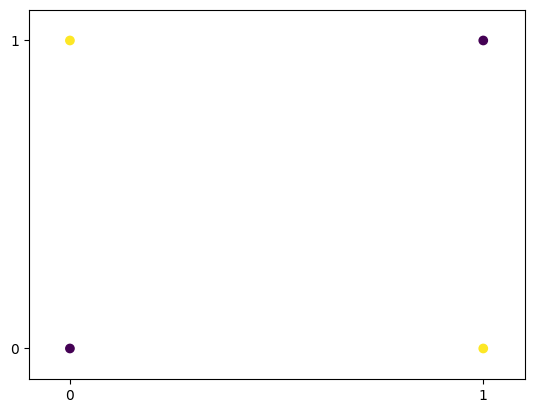

In [50]:
# Visualizando esse resultado graficamente
fig, ax = plt.subplots()

# Criando um array de x
X_perc = np.linspace(-0.1,1,100)

# Agora calculando o y
y_perc = (-w1*X_perc - w0) / w2

ax.scatter(dados.x1, dados.x2, c=dados.y)
ax.plot(X_perc, y_perc, 'r')

ax.set(xlim=[-0.1,1.1], xticks=[0,1],
       ylim=[-0.1,1.1], yticks=[0,1])

plt.show()

### Observação:
Como os dados no caso do XOR não são linearmente separavéis, o Perceptron não foi capaz de trabalhar nele e acabou nem conseguindo gerar um resultado